In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import const

In [3]:
poi = pd.read_pickle('../data/processed/poi.pickle')
poi

,ID,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,A-2047758,False,False,False,False,False,False,False,False,False,False,False,True,False
1,A-4694324,False,False,False,False,False,False,False,False,False,False,False,False,False
2,A-5006183,False,False,False,False,False,False,False,False,False,False,False,True,False
3,A-4237356,False,False,False,False,False,False,False,False,False,False,False,False,False
4,A-6690583,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,False,False,False,False,False,False,False,False,False,False,False,False,False
499996,A-6323243,False,False,False,False,False,False,False,False,False,False,False,False,False
499997,A-3789256,False,False,True,True,False,False,False,False,False,False,False,True,False
499998,A-7030381,False,False,False,False,False,False,False,False,False,False,False,True,False


In [38]:
boolean_columns = poi.columns.drop('ID')
boolean_columns

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [101]:
boolean_columns = poi.columns.difference(['ID'])

# Melt the DataFrame to a long format
melted_df = pd.melt(poi, id_vars=['ID'], value_vars=boolean_columns)

# Filter rows where the value is True
true_rows = melted_df[melted_df['value'] == True]

# Extract 'ID' and 'POI' columns
id_poi = true_rows[['ID', 'variable']].rename(columns={'variable': 'POI'})
id_poi

,ID,POI
19,A-5659848,Amenity
66,A-1656217,Amenity
68,A-3387204,Amenity
195,A-255908,Amenity
272,A-5085765,Amenity
...,...,...
5810816,A-5071594,Traffic_Signal
5810821,A-3807203,Traffic_Signal
5810823,A-826167,Traffic_Signal
5810829,A-3789256,Traffic_Signal


In [95]:
(
    id_poi
    .groupby('ID')
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
    .sort_values('count', ascending=False)
    .groupby('count')
    .agg(
        sum=('count', 'sum'),
    )
    .reset_index()
)

,count,sum
0,1,97747
1,2,77064
2,3,23622
3,4,5152
4,5,870
5,6,90
6,7,7


In [164]:
df_gp_poi = (
    id_poi
    .groupby('POI')
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
    .sort_values('count', ascending=False)
)
df_gp_poi

,POI,count
11,Traffic_Signal,72669
2,Crossing,55127
4,Junction,35907
9,Stop,13664
8,Station,12699
0,Amenity,6061
6,Railway,4217
3,Give_Way,2317
5,No_Exit,1221
10,Traffic_Calming,454


<Axes: xlabel='POI'>

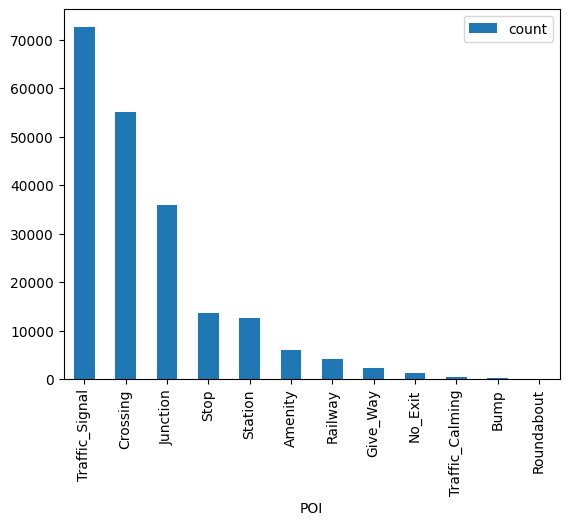

In [165]:
(
    df_gp_poi.plot(x='POI', y='count', kind='bar')
)

In [98]:
time = pd.read_pickle('../data/processed/time.pickle')
time

,ID,Start_Time,End_Time,Timezone,year,hour,weekday,weekday_name,weekend,month,day
0,A-2047758,2019-06-12 10:10:56,2019-06-12 10:55:58,US/Central,2019,10,2,Wed,0,6,12
1,A-4694324,2022-12-03 23:37:14,2022-12-04 01:56:53,US/Eastern,2022,23,5,Sat,1,12,3
2,A-5006183,2022-08-20 13:13:00,2022-08-20 15:22:45,US/Pacific,2022,13,5,Sat,1,8,20
3,A-4237356,2022-02-21 17:43:04,2022-02-21 19:43:23,US/Central,2022,17,0,Mon,0,2,21
4,A-6690583,2020-12-04 01:46:00,2020-12-04 04:13:09,US/Pacific,2020,1,4,Fri,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,2021-12-15 07:30:00,2021-12-15 07:50:30,US/Pacific,2021,7,2,Wed,0,12,15
499996,A-6323243,2021-12-19 16:25:00,2021-12-19 17:40:37,US/Eastern,2021,16,6,Sun,1,12,19
499997,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13
499998,A-7030381,2020-05-15 17:20:56,2020-05-15 17:50:56,US/Eastern,2020,17,4,Fri,0,5,15


In [143]:
time_poi = pd.merge(time, id_poi, on='ID', how='left')
time_poi

,ID,Start_Time,End_Time,Timezone,year,hour,weekday,weekday_name,weekend,month,day,POI
0,A-2047758,2019-06-12 10:10:56,2019-06-12 10:55:58,US/Central,2019,10,2,Wed,0,6,12,Traffic_Signal
1,A-4694324,2022-12-03 23:37:14,2022-12-04 01:56:53,US/Eastern,2022,23,5,Sat,1,12,3,NaN
2,A-5006183,2022-08-20 13:13:00,2022-08-20 15:22:45,US/Pacific,2022,13,5,Sat,1,8,20,Traffic_Signal
3,A-4237356,2022-02-21 17:43:04,2022-02-21 19:43:23,US/Central,2022,17,0,Mon,0,2,21,NaN
4,A-6690583,2020-12-04 01:46:00,2020-12-04 04:13:09,US/Pacific,2020,1,4,Fri,0,12,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
543152,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13,Crossing
543153,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13,Give_Way
543154,A-3789256,2022-04-13 19:28:29,2022-04-13 21:33:44,US/Mountain,2022,19,2,Wed,0,4,13,Traffic_Signal
543155,A-7030381,2020-05-15 17:20:56,2020-05-15 17:50:56,US/Eastern,2020,17,4,Fri,0,5,15,Traffic_Signal


In [141]:
traffic_impact = pd.read_pickle('../data/processed/traffic_impact.pickle')
traffic_impact

,ID,Severity,Distance(m)
0,A-2047758,2,0.0
1,A-4694324,2,90.1
2,A-5006183,2,35.4
3,A-4237356,2,1696.2
4,A-6690583,2,74.0
...,...,...,...
499995,A-6077227,2,254.3
499996,A-6323243,2,64.4
499997,A-3789256,2,883.5
499998,A-7030381,3,0.0


In [145]:
traffic_impact_poi = pd.merge(traffic_impact, id_poi, on='ID', how='left')
traffic_impact_poi

,ID,Severity,Distance(m),POI
0,A-2047758,2,0.0,Traffic_Signal
1,A-4694324,2,90.1,NaN
2,A-5006183,2,35.4,Traffic_Signal
3,A-4237356,2,1696.2,NaN
4,A-6690583,2,74.0,NaN
...,...,...,...,...
543152,A-3789256,2,883.5,Crossing
543153,A-3789256,2,883.5,Give_Way
543154,A-3789256,2,883.5,Traffic_Signal
543155,A-7030381,3,0.0,Traffic_Signal


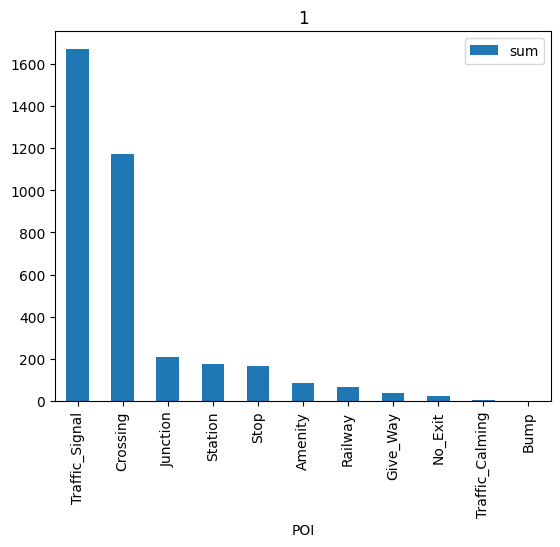

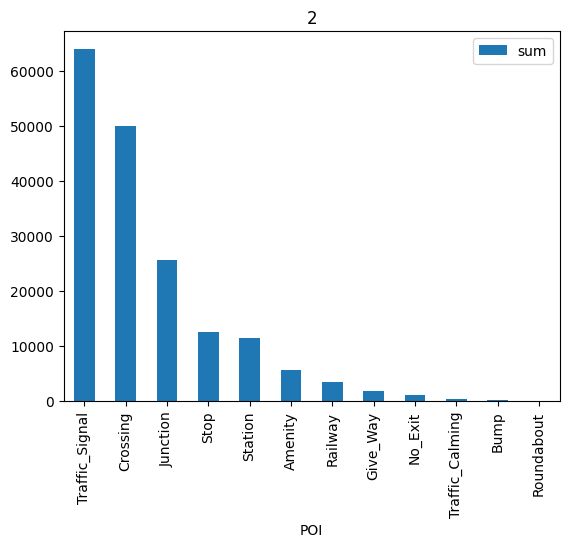

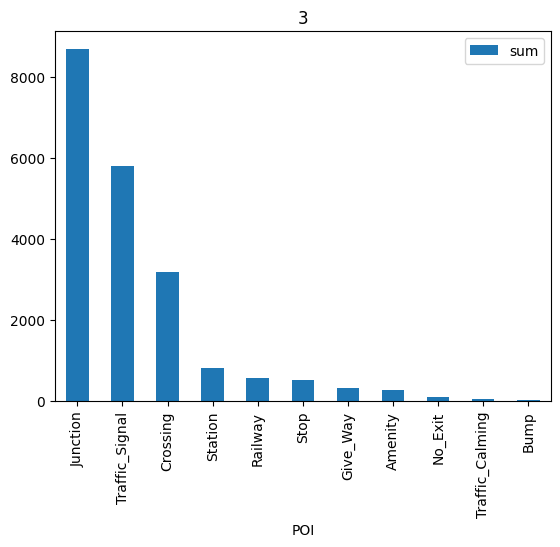

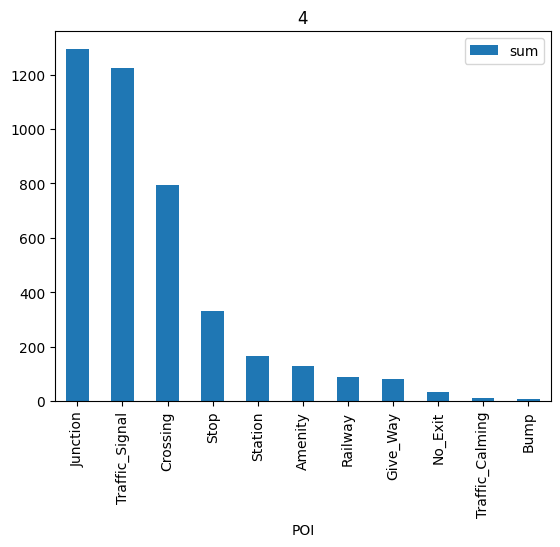

In [163]:
x = (
    traffic_impact_poi[~traffic_impact_poi['POI'].isna()]
    .groupby(['Severity','POI'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
severity = x['Severity'].drop_duplicates()
for i in severity:
    (
        x
        .query(f'Severity == {i}')
        .groupby('POI')
        .agg(
            sum=('count', 'sum')
        )
        .reset_index()
        .sort_values('sum', ascending=False)
        .plot(x='POI', y='sum', kind='bar', title=i)
    )
